In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import streamlit as str
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_curve, roc_auc_score

In [2]:
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Examining the features.
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df_test = df_test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## Types:

## Visualisations :

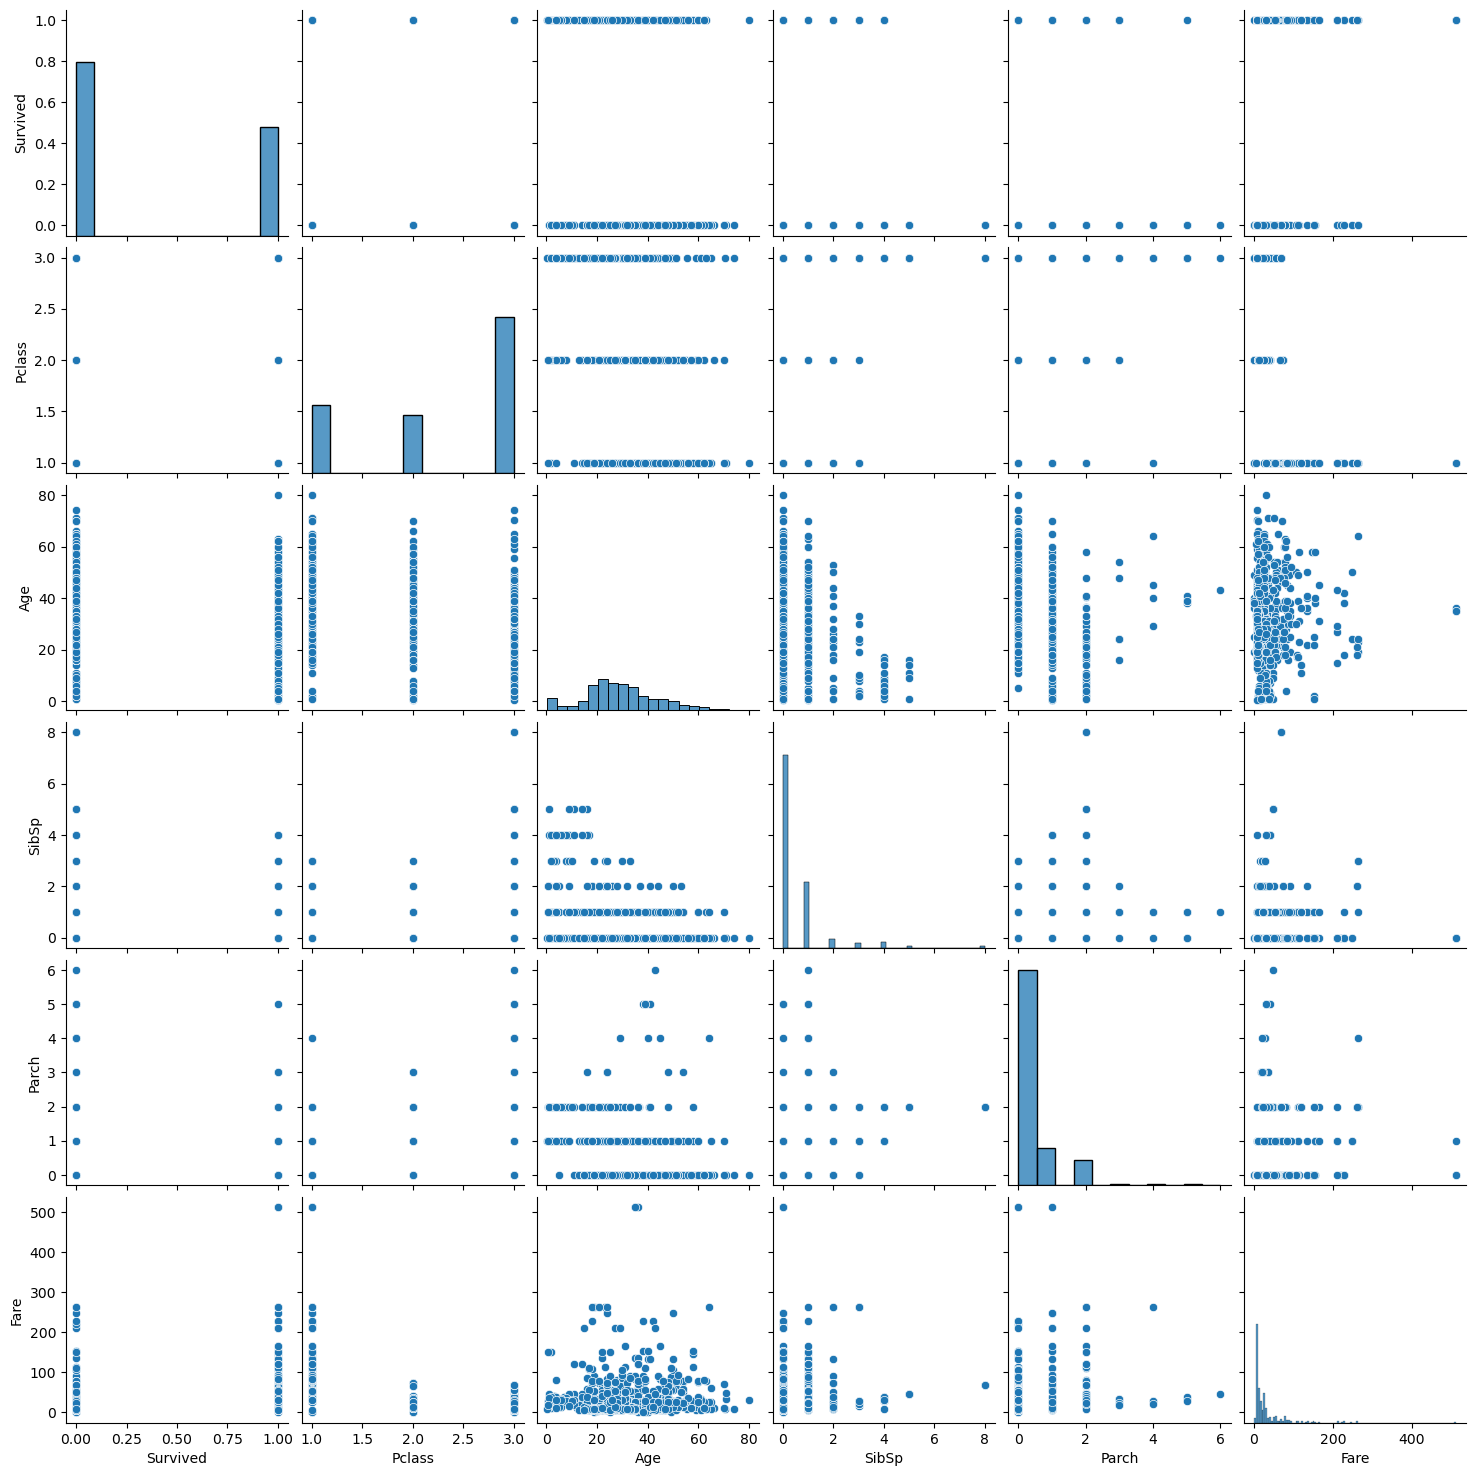

In [8]:
sns.pairplot(df_train)
plt.show()

## 2. Data Preprocessing:

In [10]:
## Handling missing values:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [12]:
# fill null values with Mode:
df_train['Age'].fillna(st.mode(df_train['Age']), inplace=True)

C:\Users\bahub\AppData\Local\Temp\ipykernel_4164\209200864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(st.mode(df_train['Age']), inplace=True)


In [13]:
df_test['Age'].fillna(st.mode(df_test['Age']), inplace=True)

C:\Users\bahub\AppData\Local\Temp\ipykernel_4164\4068030932.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(st.mode(df_test['Age']), inplace=True)


In [14]:
df_train['Embarked'].fillna(st.mode(df_train['Embarked']), inplace=True)
df_test['Fare'].fillna(st.mode(df_test['Fare']), inplace=True)

C:\Users\bahub\AppData\Local\Temp\ipykernel_4164\1578798099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(st.mode(df_train['Embarked']), inplace=True)
C:\Users\bahub\AppData\Local\Temp\ipykernel_4164\1578798099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [15]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Encoding categorical variables.

In [18]:
lb = LabelEncoder()

In [19]:
np.unique(df_test['Sex'])

array(['female', 'male'], dtype=object)

In [20]:
arr = lb.fit_transform(df_train[['Sex']])
# converted value of female to 0 and male to 1.

C:\Users\bahub\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
df_train['Sex'] = arr

In [22]:
arr1 = arr = lb.fit_transform(df_test[['Sex']])
df_test['Sex'] = arr1

C:\Users\bahub\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
np.unique(df_test['Embarked'])

array(['C', 'Q', 'S'], dtype=object)

In [24]:
arr2 = lb.fit_transform(df_train[['Embarked']]) # ['C', 'Q', 'S'] converted to [0, 1, 2]
df_train['Embarked'] = arr2

C:\Users\bahub\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
arr3 = lb.fit_transform(df_test[['Embarked']])
df_test['Embarked'] = arr3

C:\Users\bahub\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
## spliting data:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [27]:
features = df_train.drop('Survived', axis=1)
target = df_train['Survived']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, target)

## 3. Model building:

In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\bahub\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# predicting the test data
lr.predict(df_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 4. Model Evaluation:

In [33]:
y_pred = lr.predict(x_test)

In [34]:
# Evaluating the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score
accuracy_score(y_test,y_pred)*100

79.82062780269058

In [35]:
precision_score(y_test,y_pred)*100

71.26436781609196

In [36]:
recall_score(y_test,y_pred)*100

75.60975609756098

In [37]:
f1_score(y_test,y_pred)*100

73.37278106508876

In [38]:
auc_score = roc_auc_score(y_test,y_pred)*100
auc_score

78.93962982183014

In [39]:
sigma = lr.predict_proba(x_test)[:,1]
sigma

array([0.88933347, 0.16751683, 0.10533033, 0.09223198, 0.66839555,
       0.10459994, 0.26187294, 0.34161099, 0.05839664, 0.14526984,
       0.07471261, 0.68342182, 0.79781407, 0.6169811 , 0.64392353,
       0.08171392, 0.10594732, 0.23793004, 0.89977024, 0.62771683,
       0.53545277, 0.39755596, 0.23267038, 0.24614347, 0.13679089,
       0.70307223, 0.7432375 , 0.94538352, 0.1112702 , 0.06494297,
       0.84666983, 0.92138716, 0.15606598, 0.11065894, 0.25081671,
       0.154109  , 0.5166193 , 0.27537612, 0.12033583, 0.12223464,
       0.09395187, 0.05048178, 0.06493993, 0.6657571 , 0.38771583,
       0.15420625, 0.84857256, 0.94087701, 0.61592302, 0.09191759,
       0.20239933, 0.1284984 , 0.73150636, 0.1511198 , 0.86029273,
       0.34262096, 0.07215349, 0.28294804, 0.6515998 , 0.03283823,
       0.09838141, 0.86059526, 0.07504963, 0.12030333, 0.1202768 ,
       0.60418324, 0.7874222 , 0.12364509, 0.94052529, 0.33761058,
       0.74434249, 0.65154289, 0.6365718 , 0.88662273, 0.10183

In [40]:
# fpr and tpr values with respect to threshold values for visualising roc curves'
# fpr = false positive rate and tpr = true positive rate.
fpr, tpr, threshold = roc_curve(y_test,sigma)
print(fpr,tpr,threshold)

[0.         0.         0.         0.0070922  0.0070922  0.0141844
 0.0141844  0.0212766  0.0212766  0.03546099 0.03546099 0.04255319
 0.04255319 0.04964539 0.04964539 0.05673759 0.05673759 0.07092199
 0.07092199 0.09219858 0.09219858 0.09929078 0.09929078 0.09929078
 0.09929078 0.10638298 0.10638298 0.11347518 0.11347518 0.15602837
 0.15602837 0.17730496 0.17730496 0.21276596 0.21276596 0.21985816
 0.21985816 0.25531915 0.26241135 0.26241135 0.27659574 0.27659574
 0.28368794 0.28368794 0.29787234 0.30496454 0.31914894 0.38297872
 0.38297872 0.40425532 0.40425532 0.5035461  0.5177305  0.5248227
 0.5248227  0.56028369 0.57446809 0.60283688 0.61702128 0.62411348
 0.62411348 0.63120567 0.68085106 0.69503546 0.69503546 0.80141844
 0.80141844 0.82269504 0.82269504 0.83687943 0.83687943 0.85815603
 0.85815603 0.90780142 0.90780142 1.        ] [0.         0.01219512 0.37804878 0.37804878 0.3902439  0.3902439
 0.42682927 0.42682927 0.46341463 0.46341463 0.47560976 0.47560976
 0.5        0.5    

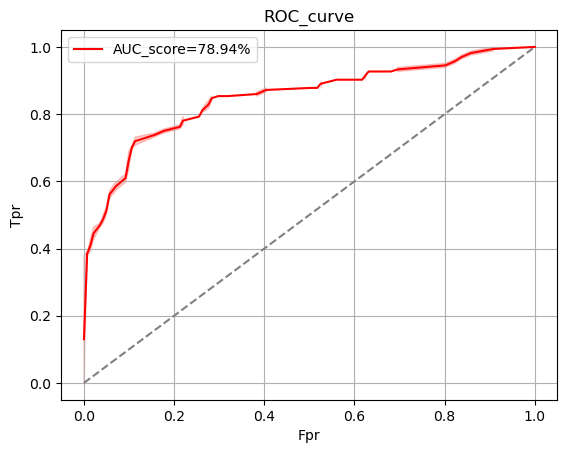

In [41]:
# visualisation for roc_auc curves:
sns.lineplot(x=fpr, y=tpr, color='r', label=f'AUC_score={auc_score:.2f}%')
plt.plot([0, 1], [0, 1], linestyle='dashed', color='grey')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC_curve')
plt.grid()
plt.legend()
plt.show()

## 5. Interpretation:
co-efficient of logistic regression model.

In [43]:
lr.coef_

array([[-1.05719405e+00, -2.61563965e+00, -3.76298084e-02,
        -3.01157100e-01, -1.89905935e-02,  5.01375430e-04,
        -1.43622084e-01]])

## 6. Deployment with Streamlit:

In [45]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [46]:
## Input from user:
def user_inp():
    pclass = st.sidebar.selectbox('Passenger class : 1st=1, 2nd=2, 3rd=3', [1, 2, 3])
    sex = st.sidebar.selectbox('Gender : male=1, female=0', [0, 1])
    age = st.sidebar.number_input('Enter age :')
    sibsp = st.sidebar.selectbox('How many siblings & spouses of the passenger aboard:', [0, 1, 2, 3, 4, 5, 6, 7, 8])
    parch = st.sidebar.selectbox('Number of parents or children a passenger was traveling with:', [0, 1, 2, 3, 4, 5, 6])
    fare = st.sidebar.number_input('Enter fare :')
    embarked = st.sidebar.selectbox('Port of embarkation : Cherbourg=0, Queenstown=1, Southampton=2', [0, 1, 2])
    data = {'Pclass':pclass, 'Sex':sex, 'Age':age, 'SibSp':sibsp, 'Parch':parch, 'Fare':fare, 'Embarked':embarked}
    features = pd.DataFrame(data, index=[0])
    return features

In [ ]:
df = user_inp()

In [ ]:
st.subheader('You entered :')
st.write(df)
st.subheader('Prediction')
y_pred = lr.predict(df)
st.write('Survived' if y_pred==1 else 'Not Survived')
st.subheader('Predict_prob')
pred_prob = lr.predict_proba(df)
st.write(pred_prob)

## Interview questions: